<a href="https://colab.research.google.com/github/Kokila412/ML_internship/blob/main/basicml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [83]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/Kokila412/ML_internship/refs/heads/main/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [84]:
y=df['sepal.length']
y

,sepal.length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [85]:
X=df.drop(['sepal.length','variety'],axis=1)
X

,sepal.width,petal.length,petal.width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [98]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)



In [87]:
y_train

,sepal.length
88,5.6
144,6.7
9,4.9
24,4.8
124,6.7
...,...
68,6.2
55,5.7
74,6.4
33,5.5


In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [101]:
lr.score(X_test,y_test)

0.9071223495431746

In [102]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error,r2_score
mse1=mean_squared_error(y_train,y_train_pred)
r2_score1=r2_score(y_train,y_train_pred)
mse2=mean_squared_error(y_test,y_test_pred)
r2_score2=r2_score(y_test,y_test_pred)
print(mse1,r2_score1,mse2,r2_score2)

0.10468270828753427 0.8404414497216205 0.06711545416789 0.9071223495431746


In [116]:
lr_results=pd.DataFrame({'mse':[mse1,mse2],'r2_score':[r2_score1,r2_score2]},index=['train','test'])
lr_results

,mse,r2_score
train,0.104683,0.840441
test,0.067115,0.907122


In [117]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [118]:
dt_train_pred=dt.predict(X_train)
dt_test_pred=dt.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error,r2_score
rf_mse1=mean_squared_error(y_train,dt_train_pred)
rf_r2_score1=r2_score(y_train,dt_train_pred)
rf_mse2=mean_squared_error(y_test,dt_test_pred)
rf_r2_score2=r2_score(y_test,dt_test_pred)

In [119]:
rf_results=pd.DataFrame({'mse':[rf_mse1,rf_mse2],'r2_score':[rf_r2_score1,rf_r2_score2]},index=['train','test'])
rf_results

,mse,r2_score
train,0.000208,0.999682
test,0.156333,0.783658


In [120]:
diff_models=pd.concat([lr_results,rf_results],axis=1)
diff_models

,mse,r2_score,mse,r2_score
train,0.104683,0.840441,0.000208,0.999682
test,0.067115,0.907122,0.156333,0.783658


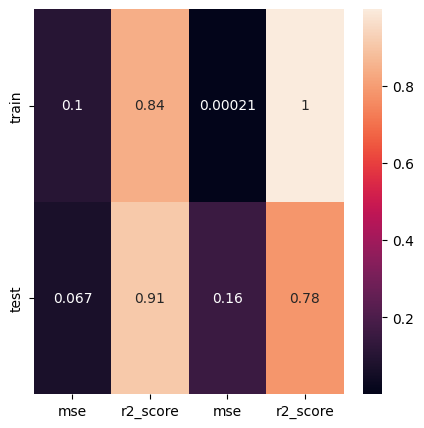

In [135]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(diff_models,annot=True)
plt.show()